## A Quick Tour of DifferentialEquations.jl

DifferentialEquations.jl is a metapackage for solving differential equations in Julia. The basic workflow is:

- Define a problem
- Solve a problem
- Plot the solution

The API between different types of differential equations is unified through multiple dispatch.

See the [DifferentialEquations.jl Documentation](http://docs.juliadiffeq.org/latest/index.html).

## Example: Lotka-Volterra ODE

$$\begin{align}
x' &= ax - bxy\\
y' &= -cy + dxy
\end{align}$$

In [2]:
using DifferentialEquations
# Define a problem
p = (1.0,2.0,1.5,1.25) # a,b,c,d
f = function (du,u,p,t) # Define f as an in-place update into du
    a,b,c,d = p
    du[1] = a*u[1] - b*u[1]*u[2]
    du[2] = -c*u[2]+ d*u[1]*u[2]
end
u0 = [1.0;1.0]; tspan = (0.0,10.0)
prob = ODEProblem(f,u0,tspan,p);

In [3]:
# Solve the problem
sol = solve(prob);

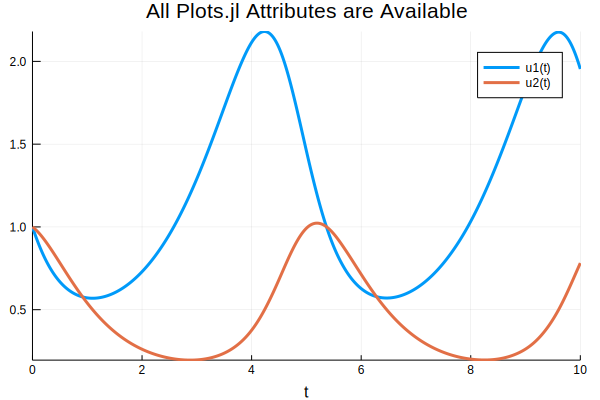

In [4]:
# Plot the solution using the plot recipe
using Plots; gr() # Using the Plotly Backend
plot(sol,title="All Plots.jl Attributes are Available")

The plot recipe [contains special fields](http://docs.juliadiffeq.org/latest/basics/plot.html) for plotting phase diagrams and other transformations:

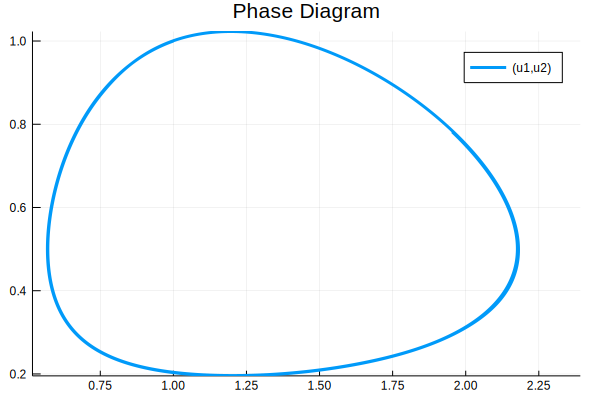

In [5]:
plot(sol,title="Phase Diagram",vars=(1,2))

## Extra Features

The solution object acts both as an array and as an interpolation of the solution

In [6]:
@show sol.t[3] # Time at the 3rd timestep
@show sol[3] # Value at the third timestep
@show sol(5) # Value at t=5 using the interpolation 

sol.t[3] = 0.2927716363874482
sol[3] = [0.768635, 0.887673]
sol(5) = [1.45932, 0.99208]


2-element Array{Float64,1}:
 1.45932
 0.99208

## Stochastic Differential Equations

Also included are problems for stochastic differential equations

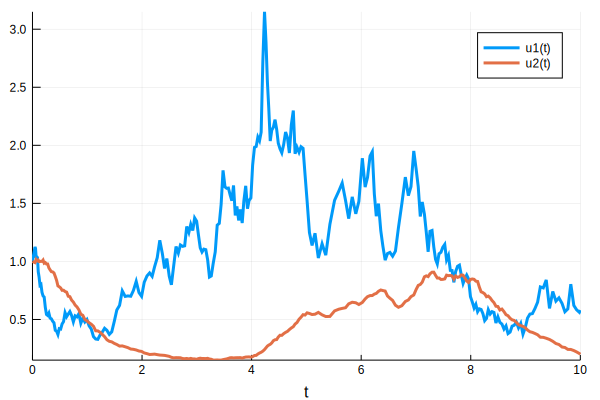

In [7]:
g = function (du,u,p,t)
    du[1] = .5*u[1] 
    du[2] = .1*u[2]
end
prob = SDEProblem(f,g,u0,tspan,p)
sol = solve(prob,dt=1/2^4)
plot(sol)

## Documentation and Extended Tutorials

For more information, see the documentation: https://github.com/JuliaDiffEq/DifferentialEquations.jl. The repository [DiffEqTutorials.jl](https://github.com/JuliaDiffEq/DiffEqTutorials.jl) has a large array of tutorials for using the package in depth.

## Problems 

### Problem 1

The DifferentialEquations.jl algorithms choose the number type of their calculation given their input. Use this fact to solve the [Lorenz equation](https://en.wikipedia.org/wiki/Lorenz_system) using BigFloats. You may want to [check out the example notebooks](https://github.com/JuliaDiffEq/DiffEqTutorials.jl). Make a 3D plot of the Lorenz attractor using the plot recipe.



### Problem 2

Use the [event handling](http://docs.juliadiffeq.org/latest/features/callback_functions.html) the model a bouncing ball with friction, i.e. at every bounce the velocity flips but is decreased to 80%. Does the ball eventually stop bouncing?